In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#For my toy model, I represent the honeycomb polygon centers by a two dimensional matrix where each element 
#has eight nearest neighbors,but a honeycomb polygon has only six adjacent hexagons.
#Due to this, to make life easy, I exclude a pair of nearest neighbors in same pattern in each trial
#I have restricted the bee to jump to cells [i-1,j-1] and [i+1,j+1] in each trial,

#The mean and standard deviation will be reported for the average distances of 16 trials and 
#repeated for 1000 times using the central limit theorem 

n = 16 #number of trials 

#Declare the size of matrix to make the computation faster
xx = 2*n + 5 #number of rows of matrix, allow enough space in boundary after n trials
yy = 2*n + 5 # number of columns of matrix

#Create a matrix whose elements represent the position of bee inside a hexagon with unique ID 
a = np.random.random((xx,yy)) 

#Declare the starting position
start_x = 16 #Change it to 32 for n = 64 steps
start_y = 16 #change it to 32 for n=64 steps

#Define an array to keep record of the distances
distance = np.zeros(1000)
distance_cond = [] #collect the distances using the conditional probability

for x in range(1000):
    #Array to keep track of the position of bee
    bee_position = np.zeros(n)
    #initialize the position of bee from the center hexagongonal grid
    ii = start_x #it helps to avoid the boundary problems
    jj = start_y
    
    for p in range(n):
        i = ii
        j = jj
        
        #The maximum distance the bee can go in n steps is n cells in both vertical and horizontal direction
        #so make sure the bee is inside the desired boundary to avoid errors
        if ((i < 2*n+4) & (j<2*n+4)): #check if the 
            #print(ii,jj)
            #There are four pairs of adjacent cells, choose only adj 3 pairs,disregard one
            adj_cells = np.array([a[i-1,j],a[i+1,j],a[i,j-1],a[i,j+1],a[i-1,j+1],a[i+1,j-1]])
            #Here I didn't take into account the pairs a[i-1,j-1] and a[i+1,j+1]
        
        #choose a random cell to jump using a random number generator between 0 and 5
        #This is because the bee has equal probability to go to any adjacent polygons
        a1 = np.random.randint(0,6,1)
        b1 = np.int(a1)
        
        #new element of the matrix which represents the center of polygon 
        #where the bee jumps in the next step
        a1c = adj_cells[b1]
        
        #keep track of the element in matrix to know where the bee arrived
        bee_position[p] = a1c
        
        for q in range(xx):
            for r in range(yy):
                if a[q,r] == a1c:
                    ii = q
                    jj = r
           
    #After the end of each specific trials like 16, last element in bee_position array is the 
    #final position of the bee
    #print(bee_position[-1])
    for m in range(xx):
        for l in range(yy):
            if a[m,l] == bee_position[-1]:
                x_pos = m #the row number
                y_pos = l # the column number
    
    # x_pos and y_pos define the final position of the bee after n trials
    #Calculate the distance from the original position
    #print(ii,jj)
    d = np.sqrt((x_pos - start_x)**2  + (y_pos - start_y)**2)
    
    distance[x] = d

    #print(distance)
#Using the central limit theorem
print(np.mean(distance))

print(np.std(distance))

    
    
    
    
    
    
    
    
    
    

4.12038244116
2.31159004553


(array([  99.,  184.,  208.,  235.,  106.,   82.,   52.,   23.,    8.,    3.]),
 array([  0.        ,   1.28062485,   2.56124969,   3.84187454,
          5.12249939,   6.40312424,   7.68374908,   8.96437393,
         10.24499878,  11.52562363,  12.80624847]),
 <a list of 10 Patch objects>)

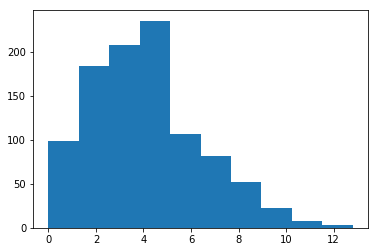

In [2]:
plt.hist(distance)
     


In [3]:
x8gr = distance >=8
x8less = distance <8
x6 = distance>=6

distance_geq_8 = distance[x8gr] #distance greateer or equal to 8
distance_geq_6 = distance[x6] #distance greater or equal to 6
distance_less_8 = distance[x8less] #distance less than 8
 
#Probability that the distance is at least 8
p8 = len(distance_geq_8)/len(distance)

#Probability that the distance is at least 6
p6 = len(distance_geq_6)/len(distance)

#probability that the distance is less than 8 given it is at least 6 is:
p8_given6 = len(distance_less_8)/len(distance_geq_6)

#probability that the distance is at least 8 given it is at least 6 is 
p_atleast8 = 1 - p8_given6
#print(p8most_given6)

print(p8,p6,p8_given6,p_atleast8)
print(len(distance_geq_8)/len(distance_geq_6))

0.074 0.211 4.388625592417061 -3.3886255924170614
0.35071090047393366


In [4]:
n = 64 #number of trials 

#Declare the size of matrix to make the computation faster
xx = 2*n + 5 #number of rows of matrix, allow enough space in boundary after n trials
yy = 2*n + 5 # number of columns of matrix

#Create a matrix whose elements represent the position of bee inside a hexagon with unique ID 
a = np.random.random((xx,yy)) 

#starting positions:
#start_x = int((xx-5)/2)
#start_y = int((yy-5)/2)

start_x = 32
start_y = 32

#Define an array to keep record of the distances
distance = np.zeros(1000)

for x in range(1000):
    #Array to keep track of the position of bee
    bee_position = np.zeros(n)
    #initialize the position of bee from the center hexagongonal grid
    ii = start_x #it helps to avoid the boundary problems
    jj = start_y
    
    for p in range(n):
        i = ii
        j = jj
        
        #The maximum distance the bee can go in n steps is n cells in both vertical and horizontal direction
        #so make sure the bee is inside the desired boundary to avoid errors
        if ((i < 2*n+4) & (j<2*n+4)): #check if the 
            #print(ii,jj)
            #There are four pairs of adjacent cells, choose only adj 3 pairs,disregard one
            adj_cells = np.array([a[i-1,j],a[i+1,j],a[i,j-1],a[i,j+1],a[i-1,j+1],a[i+1,j-1]])
            #Here I didn't take into account the pairs a[i-1,j-1] and a[i+1,j+1]
        
        #choose a random cell to jump using a random number generator between 0 and 5
        #This is because the bee has equal probability to go to any adjacent polygons
        a1 = np.random.randint(0,6,1)
        b1 = np.int(a1)
        
        #new element of the matrix which represents the center of polygon 
        #where the bee jumps in the next step
        a1c = adj_cells[b1]
        
        #keep track of the element in matrix to know where the bee arrived
        bee_position[p] = a1c
        
        for q in range(xx):
            for r in range(yy):
                if a[q,r] == a1c:
                    ii = q
                    jj = r
           
    #After the end of each specific trials like 16, last element in bee_position array is the 
    #final position of the bee
    #print(bee_position[-1])
    for m in range(xx):
        for l in range(yy):
            if a[m,l] == bee_position[-1]:
                x_pos = m #the row number
                y_pos = l # the column number
    
    # x_pos and y_pos define the final position of the bee after n trials
    #Calculate the distance from the original position
    #print(ii,jj)
    d = np.sqrt((x_pos - start_x)**2  + (y_pos - start_y)**2)
    
    distance[x] = d

    #print(distance)
print(np.mean(distance))

print(np.std(distance))


8.21934339671
4.62756892191


In [ ]:
plt.hist(distance)